In [7]:
# import packages and set parameters
import pandas as pd
import numpy as np
import xgboost as xgb
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import SelectFromModel


params={
    'objective':'multi:softmax',
    'eta':0.1,
    'max_depth':5,
    'num_class':3
}
num_round = 500

In [2]:
# read the data
test_X_raw = pd.read_csv('AMF_test_X.csv')
train_X_raw = pd.read_csv('AMF_train_X.csv')
train_Y_raw = pd.read_csv('AMF_train_Y.csv')
out = pd.read_csv('random_file.csv')

pd.set_option('display.max_columns', None)
dict1 = dict(zip(train_Y_raw['Trader'],train_Y_raw['type']))
train_X_raw['type'] = train_X_raw['Trader'].map(dict1)

## Preprocess data

In [3]:
# preprocess data
train_X = train_X_raw[['OTR', 'OCR', 'OMR',
       'min_time_two_events', 'mean_time_two_events', '10_p_time_two_events',
       'med_time_two_events', '25_p_time_two_events', '75_p_time_two_events',
       '90_p_time_two_events', 'max_time_two_events', 'min_lifetime_cancel',
       'mean_lifetime_cancel', '10_p_lifetime_cancel', 'med_lifetime_cancel',
       '25_p_lifetime_cancel', '75_p_lifetime_cancel', '90_p_lifetime_cancel',
       'max_lifetime_cancel', 'NbTradeVenueMic', 'MaxNbTradesBySecond',
       'MeanNbTradesBySecond', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3',
       'mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'min_dt_TV1_TV4',
       'mean_dt_TV1_TV4', 'med_dt_TV1_TV4', 'NbSecondWithAtLeatOneTrade']]
train_Y = train_X_raw['type']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(train_X.fillna(0),train_Y,test_size=0.3)

# encode labels
Ytrain.replace("NON HFT",0,inplace = True)
Ytrain.replace("MIX",1,inplace = True)
Ytrain.replace("HFT",2,inplace = True)
Ytest.replace("NON HFT",0,inplace = True)
Ytest.replace("MIX",1,inplace = True)
Ytest.replace("HFT",2,inplace = True)

In [6]:
train_X.head

<bound method NDFrame.head of              OTR         OCR         OMR  min_time_two_events  \
0       2.272727    8.333333   12.500000                  0.0   
1       1.696629   25.166667   21.571429                  0.0   
2       1.482759   47.300000  118.250000                  0.0   
3       1.705882   14.500000   29.000000                  0.0   
4       1.517730   26.750000         NaN                  0.0   
...          ...         ...         ...                  ...   
105777  1.150000   23.000000         NaN                  0.0   
105778  1.352941   23.000000         NaN                  0.0   
105779  1.146667   86.000000         NaN                  0.0   
105780  1.179191  204.000000         NaN                  0.0   
105781  1.178571   66.000000         NaN                  0.0   

        mean_time_two_events  10_p_time_two_events  med_time_two_events  \
0                5117.830300              0.000000           419.688500   
1                1846.968401           

In [4]:
xgb_train = xgb.DMatrix(Xtrain,label=Ytrain)
xgb_test = xgb.DMatrix(Xtest,label=Ytest)

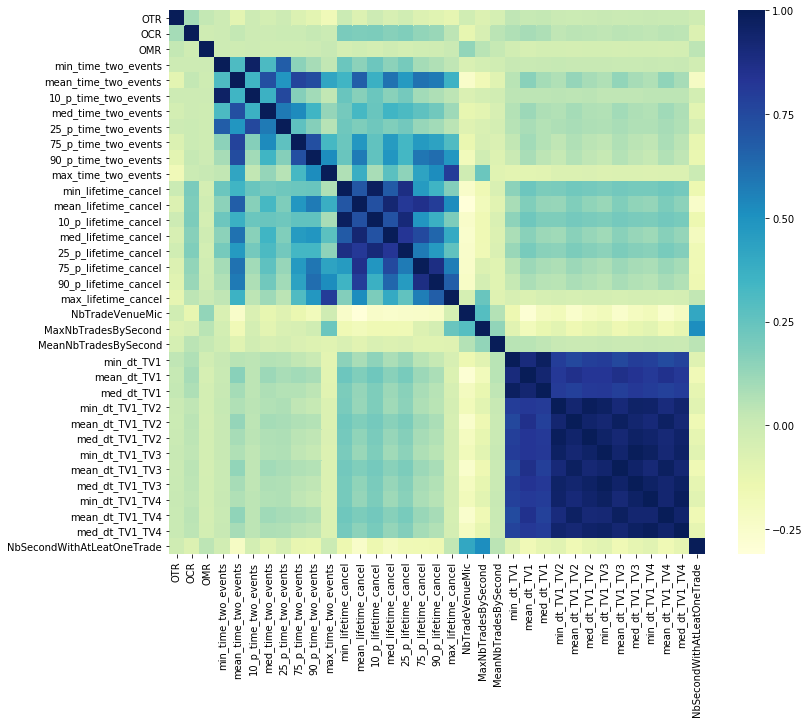

In [5]:
# feauture correlation
corr = train_X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='YlGnBu')

## Feature Importance

In [8]:
# transform the data
xgb_train = xgb.DMatrix(Xtrain,label=Ytrain)
xgb_test = xgb.DMatrix(Xtest,label=Ytest)

# construct the model
watchlist=[(xgb_train,'train'),(xgb_test,'test')]
xgb_model = xgb.train(params,xgb_train,num_round,watchlist)

[12:36:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:0.99027	test-mlogloss:0.99053
[1]	train-mlogloss:0.89929	test-mlogloss:0.89993
[2]	train-mlogloss:0.82112	test-mlogloss:0.82183
[3]	train-mlogloss:0.75454	test-mlogloss:0.75533
[4]	train-mlogloss:0.69563	test-mlogloss:0.69641
[5]	train-mlogloss:0.64314	test-mlogloss:0.64392
[6]	train-mlogloss:0.59672	test-mlogloss:0.59760
[7]	train-mlogloss:0.55447	test-mlogloss:0.55541
[8]	train-mlogloss:0.51720	test-mlogloss:0.51820
[9]	train-mlogloss:0.48296	test-mlogloss:0.48409
[10]	train-mlogloss:0.45246	test-mlogloss:0.45350
[11]	train-mlogloss:0.42494	test-mlogloss:0.42599
[12]	train-mlogloss:0.40072	test-mlogloss:0.40176
[13]	train-mlogloss:0.37919	test-mlogloss:0.38025


[157]	train-mlogloss:0.05632	test-mlogloss:0.06965
[158]	train-mlogloss:0.05596	test-mlogloss:0.06936
[159]	train-mlogloss:0.05571	test-mlogloss:0.06918
[160]	train-mlogloss:0.05543	test-mlogloss:0.06898
[161]	train-mlogloss:0.05524	test-mlogloss:0.06881
[162]	train-mlogloss:0.05500	test-mlogloss:0.06867
[163]	train-mlogloss:0.05466	test-mlogloss:0.06839
[164]	train-mlogloss:0.05432	test-mlogloss:0.06810
[165]	train-mlogloss:0.05406	test-mlogloss:0.06792
[166]	train-mlogloss:0.05385	test-mlogloss:0.06780
[167]	train-mlogloss:0.05361	test-mlogloss:0.06766
[168]	train-mlogloss:0.05337	test-mlogloss:0.06746
[169]	train-mlogloss:0.05321	test-mlogloss:0.06736
[170]	train-mlogloss:0.05292	test-mlogloss:0.06710
[171]	train-mlogloss:0.05253	test-mlogloss:0.06682
[172]	train-mlogloss:0.05238	test-mlogloss:0.06676
[173]	train-mlogloss:0.05216	test-mlogloss:0.06656
[174]	train-mlogloss:0.05202	test-mlogloss:0.06645
[175]	train-mlogloss:0.05180	test-mlogloss:0.06631
[176]	train-mlogloss:0.05153	te

[318]	train-mlogloss:0.02801	test-mlogloss:0.05155
[319]	train-mlogloss:0.02792	test-mlogloss:0.05149
[320]	train-mlogloss:0.02783	test-mlogloss:0.05148
[321]	train-mlogloss:0.02770	test-mlogloss:0.05142
[322]	train-mlogloss:0.02762	test-mlogloss:0.05134
[323]	train-mlogloss:0.02749	test-mlogloss:0.05127
[324]	train-mlogloss:0.02738	test-mlogloss:0.05122
[325]	train-mlogloss:0.02728	test-mlogloss:0.05116
[326]	train-mlogloss:0.02717	test-mlogloss:0.05106
[327]	train-mlogloss:0.02706	test-mlogloss:0.05104
[328]	train-mlogloss:0.02693	test-mlogloss:0.05099
[329]	train-mlogloss:0.02681	test-mlogloss:0.05092
[330]	train-mlogloss:0.02674	test-mlogloss:0.05090
[331]	train-mlogloss:0.02663	test-mlogloss:0.05083
[332]	train-mlogloss:0.02654	test-mlogloss:0.05081
[333]	train-mlogloss:0.02645	test-mlogloss:0.05074
[334]	train-mlogloss:0.02633	test-mlogloss:0.05066
[335]	train-mlogloss:0.02624	test-mlogloss:0.05062
[336]	train-mlogloss:0.02613	test-mlogloss:0.05058
[337]	train-mlogloss:0.02607	te

[479]	train-mlogloss:0.01563	test-mlogloss:0.04533
[480]	train-mlogloss:0.01557	test-mlogloss:0.04531
[481]	train-mlogloss:0.01553	test-mlogloss:0.04529
[482]	train-mlogloss:0.01547	test-mlogloss:0.04525
[483]	train-mlogloss:0.01544	test-mlogloss:0.04525
[484]	train-mlogloss:0.01541	test-mlogloss:0.04524
[485]	train-mlogloss:0.01536	test-mlogloss:0.04521
[486]	train-mlogloss:0.01527	test-mlogloss:0.04516
[487]	train-mlogloss:0.01524	test-mlogloss:0.04517
[488]	train-mlogloss:0.01519	test-mlogloss:0.04514
[489]	train-mlogloss:0.01512	test-mlogloss:0.04509
[490]	train-mlogloss:0.01506	test-mlogloss:0.04507
[491]	train-mlogloss:0.01501	test-mlogloss:0.04504
[492]	train-mlogloss:0.01494	test-mlogloss:0.04500
[493]	train-mlogloss:0.01487	test-mlogloss:0.04500
[494]	train-mlogloss:0.01479	test-mlogloss:0.04495
[495]	train-mlogloss:0.01475	test-mlogloss:0.04492
[496]	train-mlogloss:0.01470	test-mlogloss:0.04491
[497]	train-mlogloss:0.01466	test-mlogloss:0.04487
[498]	train-mlogloss:0.01463	te

In [9]:
# model prediction
pred=xgb_model.predict(xgb_test)
error_rate=np.sum(pred!=Ytest)/Ytest.shape[0]
accuray=1-error_rate
print(accuray)

0.9852843863242476


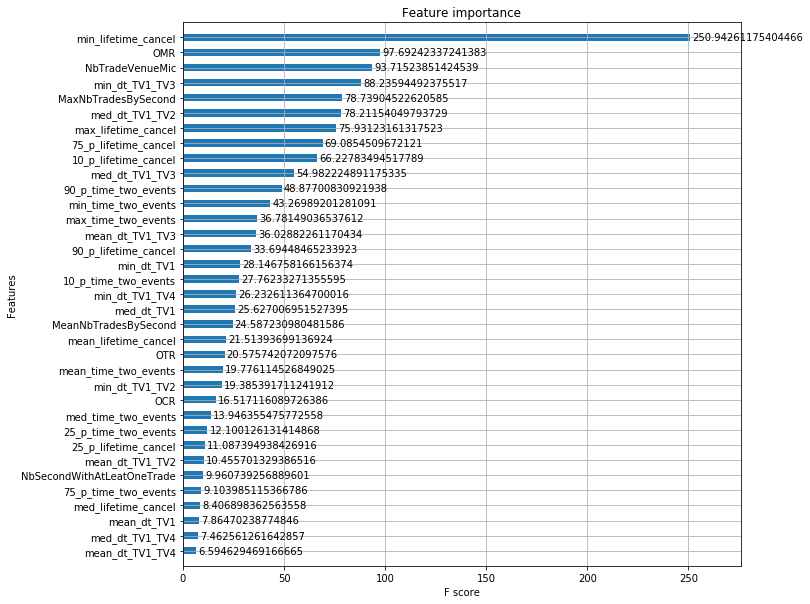

In [28]:
# feature importance
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax,importance_type='gain')
plt.show()

Text(0.5, 0, 'relative importance')

<Figure size 432x288 with 0 Axes>

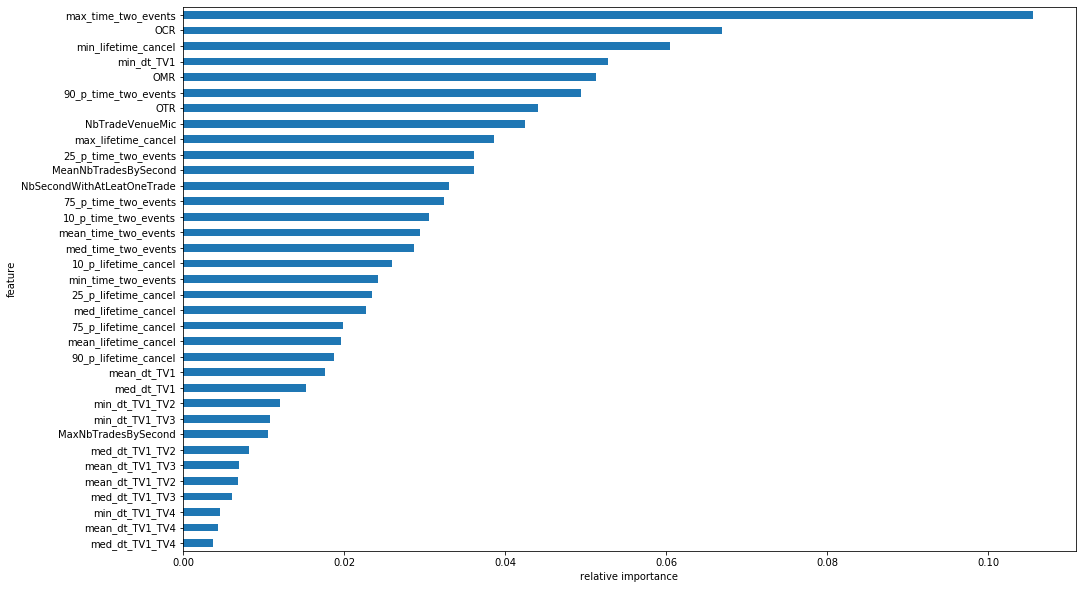

In [144]:
# relative importance
importance = xgb_model.get_fscore( )
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
 
plt.figure()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.xlabel('relative importance')

## Feature Selection

In [36]:
# construct model using XGBClassifier
model = xgb.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=200,objective='multi:softmax',use_label_encoder=False)
model.fit(Xtrain, Ytrain)

In [46]:
# feature selection
threshold = np.sort(model.feature_importances_)
accuracy_list = []
for thresh in threshold:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(Xtrain)
    # train model
    selection_model = XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=200,objective='multi:softmax',use_label_encoder=False)
    selection_model.fit(select_X_train, Ytrain)
    # eval model
    select_X_test = selection.transform(Xtest)
    y_pred = selection_model.predict(select_X_test)
    error_rate=np.sum(y_pred!=Ytest)/Ytest.shape[0]
    accuracy=1-error_rate
    accuracy_list.append(accuracy)
    print("Thresh=%.3f, n=%d, accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

[09:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=35, accuracy: 98.08%
[09:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.005, n=34, accuracy: 98.07%
[09:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old beh

Thresh=0.029, n=12, accuracy: 96.54%
[09:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.033, n=11, accuracy: 96.11%
[09:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.037, n=10, accuracy: 95.37%
[09:55:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric

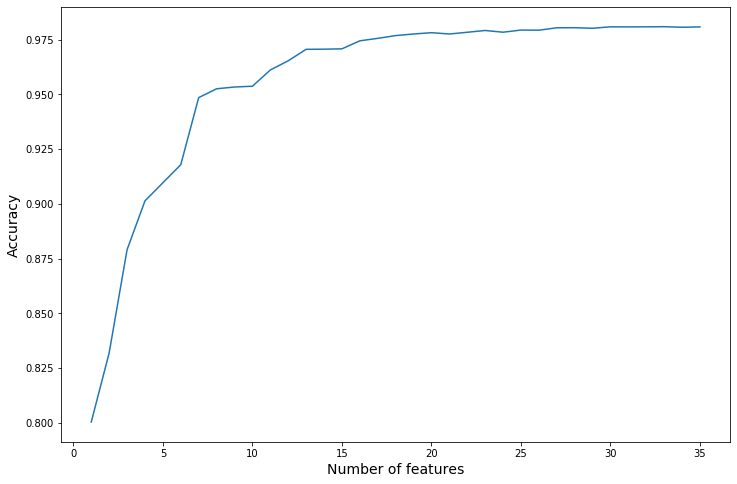

In [69]:
# plot the results
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,Xtrain.shape[1]+1),list(reversed(accuracy_list)))
plt.xlabel('Number of features',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)
plt.show()

## Simplified model

In [145]:
# new features
var_list = list(df['feature'][20:])
Xtrain_new = Xtrain[var_list]
Xtest_new = Xtest[var_list]

# train model
xgb_train = xgb.DMatrix(Xtrain_new,label=Ytrain)
xgb_test = xgb.DMatrix(Xtest_new,label=Ytest)
watchlist=[(xgb_train,'train'),(xgb_test,'test')]
xgb_model_new = xgb.train(params,xgb_train,500,watchlist)


[10:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:0.99052	test-mlogloss:0.99130
[1]	train-mlogloss:0.89778	test-mlogloss:0.89903
[2]	train-mlogloss:0.81921	test-mlogloss:0.82098
[3]	train-mlogloss:0.75155	test-mlogloss:0.75399
[4]	train-mlogloss:0.69322	test-mlogloss:0.69599
[5]	train-mlogloss:0.64109	test-mlogloss:0.64423
[6]	train-mlogloss:0.59552	test-mlogloss:0.59913
[7]	train-mlogloss:0.55486	test-mlogloss:0.55876
[8]	train-mlogloss:0.51766	test-mlogloss:0.52183
[9]	train-mlogloss:0.48470	test-mlogloss:0.48909
[10]	train-mlogloss:0.45499	test-mlogloss:0.45962
[11]	train-mlogloss:0.42845	test-mlogloss:0.43334
[12]	train-mlogloss:0.40471	test-mlogloss:0.40978
[13]	train-mlogloss:0.38257	test-mlogloss:0.38788


[157]	train-mlogloss:0.06319	test-mlogloss:0.07966
[158]	train-mlogloss:0.06284	test-mlogloss:0.07935
[159]	train-mlogloss:0.06256	test-mlogloss:0.07911
[160]	train-mlogloss:0.06221	test-mlogloss:0.07884
[161]	train-mlogloss:0.06167	test-mlogloss:0.07840
[162]	train-mlogloss:0.06130	test-mlogloss:0.07815
[163]	train-mlogloss:0.06106	test-mlogloss:0.07793
[164]	train-mlogloss:0.06082	test-mlogloss:0.07777
[165]	train-mlogloss:0.06048	test-mlogloss:0.07747
[166]	train-mlogloss:0.06021	test-mlogloss:0.07725
[167]	train-mlogloss:0.05989	test-mlogloss:0.07700
[168]	train-mlogloss:0.05961	test-mlogloss:0.07685
[169]	train-mlogloss:0.05926	test-mlogloss:0.07657
[170]	train-mlogloss:0.05899	test-mlogloss:0.07633
[171]	train-mlogloss:0.05864	test-mlogloss:0.07608
[172]	train-mlogloss:0.05828	test-mlogloss:0.07580
[173]	train-mlogloss:0.05794	test-mlogloss:0.07553
[174]	train-mlogloss:0.05763	test-mlogloss:0.07529
[175]	train-mlogloss:0.05746	test-mlogloss:0.07515
[176]	train-mlogloss:0.05723	te

[318]	train-mlogloss:0.03393	test-mlogloss:0.05949
[319]	train-mlogloss:0.03382	test-mlogloss:0.05944
[320]	train-mlogloss:0.03376	test-mlogloss:0.05941
[321]	train-mlogloss:0.03365	test-mlogloss:0.05934
[322]	train-mlogloss:0.03358	test-mlogloss:0.05930
[323]	train-mlogloss:0.03352	test-mlogloss:0.05926
[324]	train-mlogloss:0.03331	test-mlogloss:0.05915
[325]	train-mlogloss:0.03317	test-mlogloss:0.05909
[326]	train-mlogloss:0.03309	test-mlogloss:0.05906
[327]	train-mlogloss:0.03300	test-mlogloss:0.05903
[328]	train-mlogloss:0.03292	test-mlogloss:0.05897
[329]	train-mlogloss:0.03280	test-mlogloss:0.05889
[330]	train-mlogloss:0.03274	test-mlogloss:0.05885
[331]	train-mlogloss:0.03260	test-mlogloss:0.05876
[332]	train-mlogloss:0.03253	test-mlogloss:0.05871
[333]	train-mlogloss:0.03239	test-mlogloss:0.05860
[334]	train-mlogloss:0.03232	test-mlogloss:0.05858
[335]	train-mlogloss:0.03224	test-mlogloss:0.05854
[336]	train-mlogloss:0.03214	test-mlogloss:0.05850
[337]	train-mlogloss:0.03197	te

[479]	train-mlogloss:0.02120	test-mlogloss:0.05256
[480]	train-mlogloss:0.02115	test-mlogloss:0.05253
[481]	train-mlogloss:0.02113	test-mlogloss:0.05253
[482]	train-mlogloss:0.02108	test-mlogloss:0.05250
[483]	train-mlogloss:0.02103	test-mlogloss:0.05248
[484]	train-mlogloss:0.02101	test-mlogloss:0.05249
[485]	train-mlogloss:0.02092	test-mlogloss:0.05243
[486]	train-mlogloss:0.02089	test-mlogloss:0.05242
[487]	train-mlogloss:0.02084	test-mlogloss:0.05240
[488]	train-mlogloss:0.02080	test-mlogloss:0.05238
[489]	train-mlogloss:0.02077	test-mlogloss:0.05239
[490]	train-mlogloss:0.02070	test-mlogloss:0.05235
[491]	train-mlogloss:0.02066	test-mlogloss:0.05235
[492]	train-mlogloss:0.02055	test-mlogloss:0.05230
[493]	train-mlogloss:0.02051	test-mlogloss:0.05229
[494]	train-mlogloss:0.02049	test-mlogloss:0.05228
[495]	train-mlogloss:0.02044	test-mlogloss:0.05226
[496]	train-mlogloss:0.02037	test-mlogloss:0.05220
[497]	train-mlogloss:0.02030	test-mlogloss:0.05215
[498]	train-mlogloss:0.02024	te

In [146]:
# model prediction
pred=xgb_model_new.predict(xgb_test)
error_rate=np.sum(pred!=Ytest)/Ytest.shape[0]
accuray=1-error_rate
print(accuray)

0.9822278241688986


Text(0.5, 0, 'relative importance')

<Figure size 432x288 with 0 Axes>

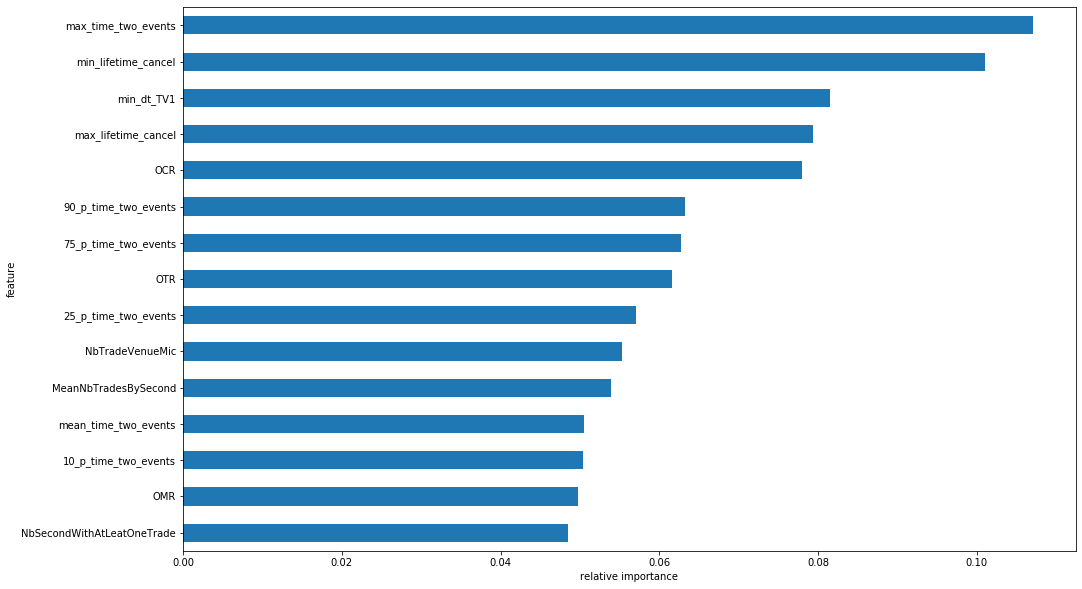

In [147]:
# relative importance
importance = xgb_model_new.get_fscore( )
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
 
plt.figure()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.xlabel('relative importance')

## Prediction

In [169]:
test_X = test_X_raw[var_list]
pred = xgb_model_new.predict(xgb.DMatrix(test_X))
test_X_raw['type'] = pred

test_Y = test_X_raw[['Trader','type']]
names = list(set(test_Y['Trader'].values))

test_Y.replace(0,"NON HFT",inplace = True)
test_Y.replace(1,"MIX",inplace = True)
test_Y.replace(2,"HFT",inplace = True)

In [170]:
tr_count = test_Y.groupby(['Trader','type']).size()
tr_sum = test_Y.groupby('Trader').size()

In [171]:
test_out = {}

In [172]:
for name in names:
    temp_count = tr_count[name]
    temp_sum = tr_sum[name]
    if 'HFT' in temp_count:
        if temp_count['HFT']/temp_sum>0.85:
            test_out[name] = 'HFT'
            continue
    if 'MIX' in temp_count:
        if temp_count['MIX']/temp_sum>0.5:
            test_out[name] = 'MIX'
            continue 
    test_out[name] = 'NON HFT'

In [173]:
test_out

{'Don Karnage': 'HFT',
 'Francis': 'HFT',
 'Boomer': 'NON HFT',
 'The Doorman': 'HFT',
 'Morgana': 'MIX',
 'Backwoods Beagle': 'MIX',
 'Mary Darling': 'NON HFT',
 'Dallben': 'NON HFT',
 'Elliott': 'NON HFT',
 'Miss Nettle': 'NON HFT',
 'Bobble': 'NON HFT',
 'Butcher Boy': 'NON HFT',
 'Max the Sheepdog': 'MIX',
 'Fairy Mary': 'NON HFT',
 'Evinrude': 'HFT',
 'Bomber Beagle': 'NON HFT',
 'Melpomene': 'HFT',
 'Annette': 'MIX',
 'Alice': 'HFT',
 'Marlon the Alligator': 'NON HFT',
 'Dr. Teeth': 'NON HFT',
 'Flash': 'MIX',
 'Baby Red Bird': 'NON HFT',
 'Dr. Delbert Doppler': 'NON HFT',
 'Bucky Oryx-Antlerson': 'NON HFT',
 'Duchess': 'MIX',
 'Madame Medusa': 'MIX',
 'Megavolt': 'MIX',
 'Dr. Joshua Sweet': 'NON HFT',
 'Bent-Tail the Coyote': 'HFT',
 'The Doorknob': 'NON HFT',
 'Emperor Belos': 'NON HFT',
 'Maui': 'HFT',
 'Becky': 'NON HFT',
 'Moana': 'NON HFT',
 'Digger the Mole': 'NON HFT',
 'Buck Leatherleaf': 'HFT',
 'Fidget': 'MIX',
 'Mad Hatter': 'HFT',
 'Merlock the Magician': 'NON HFT',


In [174]:
out

,Trader,type
0,Adelaide,MIX
1,Alana,NON HFT
2,Alcmene,NON HFT
3,Alice,HFT
4,Alices Sister,NON HFT
...,...,...
80,Monstro,MIX
81,Morgana,MIX
82,The Doorknob,NON HFT
83,The Doorman,HFT


In [175]:
out['type'] = out['Trader'].map(test_out)

In [176]:
out.to_csv('output.csv',index=False)

In [177]:
out

,Trader,type
0,Adelaide,MIX
1,Alana,NON HFT
2,Alcmene,NON HFT
3,Alice,HFT
4,Alices Sister,NON HFT
...,...,...
80,Monstro,MIX
81,Morgana,MIX
82,The Doorknob,NON HFT
83,The Doorman,HFT
